In [75]:
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#column의 이름을 dataset에 설명한 대로 받아온다, 추가적으로 0번째  row는 데이터의 설명이기 때문에 무시.
dataset = pd.read_csv('C:/Users/ksmin/data_Science/dataset/bmi_data_lab2.csv', names= ['gender', 'age', 'height','weight','BMI'], skiprows=1)
dataset.head(20)

,gender,age,height,weight,BMI
0,Female,21,65.783310,112.9925,2.0
1,Female,35,NaN,136.4873,3.0
2,Female,27,69.398740,153.0269,3.0
3,Male,24,68.216600,142.3354,3.0
4,Female,18,67.787810,144.2971,3.0
5,Female,22,68.697840,123.3024,2.0
6,Male,35,69.802040,141.4947,NaN
7,Male,19,70.014720,136.4623,3.0
8,Female,28,67.902650,112.3723,2.0
9,Male,25,NaN,120.6672,3.0


In [78]:
#150 rows, 5 columns, data type과 null값이 있는 지 파악, height과 BMI에 null값이 확인 되었다.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  150 non-null    object 
 1   age     150 non-null    int64  
 2   height  146 non-null    float64
 3   weight  150 non-null    float64
 4   BMI     145 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [79]:
#몇 개의 NaN값이 있는 지 check.
#height가 Null값이 있기 때문에 평균값으로 null값 처리.
#BMI는 BMI공식을 이용하여 처리.
dataset.isna().sum()

gender    0
age       0
height    4
weight    0
BMI       5
dtype: int64

In [80]:
#문자열을 숫자로 변환
label_encoder = LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])

#onehotencoding을 이용하여 원핫인코딩 적용
onehot_encoder = OneHotEncoder()
gender_encoded = onehot_encoder.fit_transform(dataset['gender'].values.reshape(-1,1))

#dataframe에 추가, class파일로 두 가지 행이 추가되지만 원하는 것은 0번째 column,
gender_encoded_df = pd.DataFrame(gender_encoded.toarray())
gender_encoded_df.drop(columns=[1], inplace=True)
gender_encoded_df.rename(columns={0:'gender'}, inplace=True)
df = pd.concat([gender_encoded_df, dataset.iloc[:,1:]],axis=1)

print(df.head())


   gender  age    height    weight  BMI
0     1.0   21  65.78331  112.9925  2.0
1     1.0   35       NaN  136.4873  3.0
2     1.0   27  69.39874  153.0269  3.0
3     0.0   24  68.21660  142.3354  3.0
4     1.0   18  67.78781  144.2971  3.0


In [81]:
def bmi(weight,height):
    return (weight/height**2)

In [82]:
'''
mean_height = df['height'].mean()
df['height'].fillna(mean_height, inplace=True)
'''

#df['BMI'].fillna(bmi(df['weight'],df['height']),inplace=True)

C:\Users\ksmin\AppData\Local\Temp\ipykernel_27048\1275308925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(mean_height, inplace=True)


In [83]:
df.isna().sum()

gender    0
age       0
height    0
weight    0
BMI       5
dtype: int64

In [84]:
print(df.head(20))

    gender  age      height    weight  BMI
0      1.0   21   65.783310  112.9925  2.0
1      1.0   35   80.133994  136.4873  3.0
2      1.0   27   69.398740  153.0269  3.0
3      0.0   24   68.216600  142.3354  3.0
4      1.0   18   67.787810  144.2971  3.0
5      1.0   22   68.697840  123.3024  2.0
6      0.0   35   69.802040  141.4947  NaN
7      0.0   19   70.014720  136.4623  3.0
8      1.0   28   67.902650  112.3723  2.0
9      0.0   25   80.133994  120.6672  3.0
10     0.0   34    0.000000  127.4516  NaN
11     1.0   28   67.623330  114.1430  2.0
12     0.0   21   68.302480  125.6107  3.0
13     0.0   25   67.116560  122.4618  3.0
14     1.0   27   68.279670  116.0866  2.0
15     0.0   23   71.091600  139.9975  3.0
16     0.0   20   66.461000  129.5023  3.0
17     1.0   31 -104.420555  142.9733  3.0
18     0.0   19   71.230330  137.9025  3.0
19     1.0   32   67.131180  124.0449  3.0


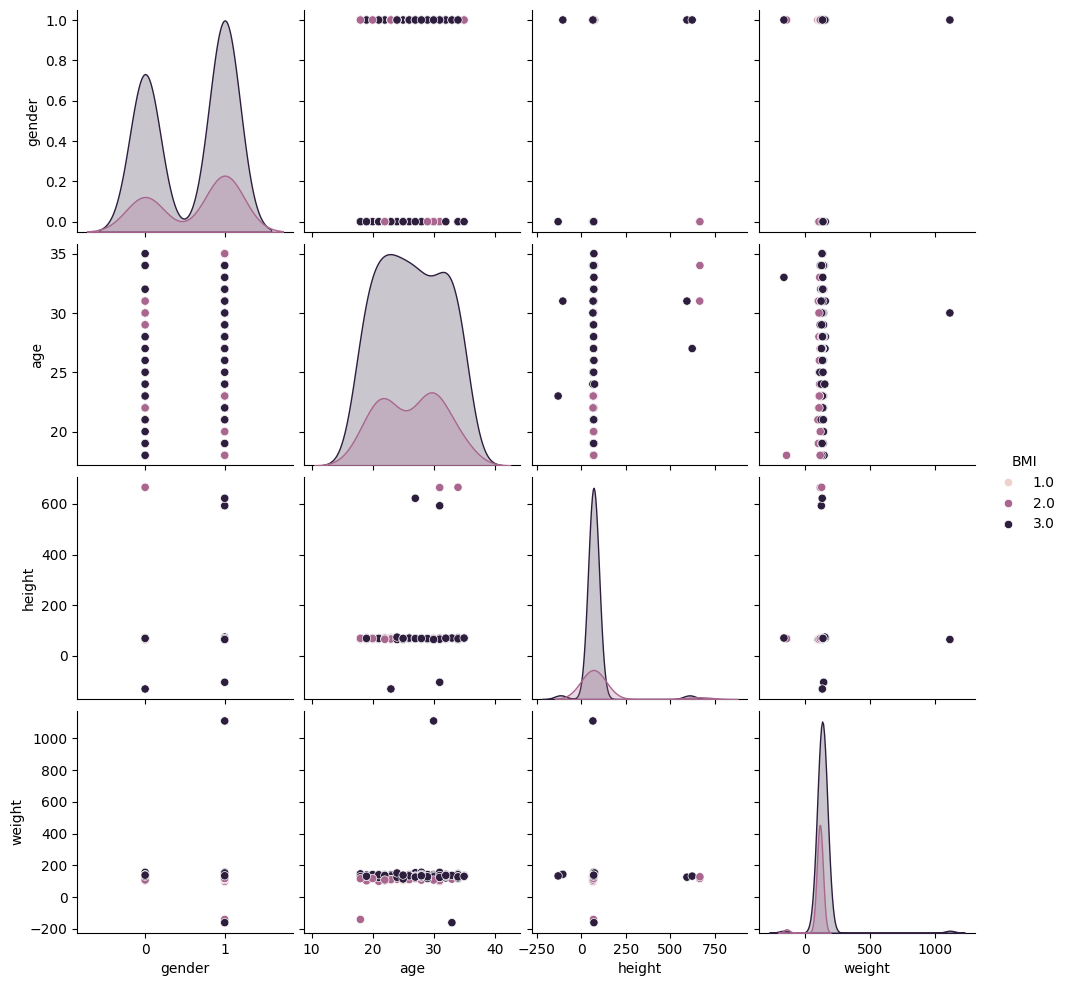

In [60]:
#BMI요소에 미치는 영향들을 분석하는 그래프 seaborn.
sns.pairplot(dataset_encoded, hue='BMI')
plt.show()

df2 = dataset_encoded.values

X = df[:,0:4]
Y = df[:,4]

